In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv("BlackFriday.csv",sep=',')

def get_data_with_and_without(data):
    mask = data.isnull().any(axis=1)
    return data[~mask], data[mask]



def nan_replase(df, column_name, strategy):
    '''
    "most_frequent"
    "mean"
    '''
    imp=Imputer(missing_values=np.nan, strategy=strategy)
    imp.fit(df[[column_name]])
    df[column_name]=imp.transform(df[[column_name]]).ravel()
    return df

def plot_show(data,col_name):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(12,7))
    sns.distplot(data[col_name], bins = 25)
    plt.xlabel("Amount spent in Purchase")
    plt.ylabel("Number of Buyers")
    plt.title("Purchase amount Distribution")

def get_missing_info(data):
    data_missing = data.isna()
    data_num_missing = data_missing.sum()
    print(data_num_missing / len(data) * 100) 
    
def get_data_LabelEncoder(data, lst):  
    le = LabelEncoder()
    encoded_series = data[lst].apply(le.fit_transform)
    for i in lst:
        data[i] = encoded_series[i]
        
    for i in data.columns:
        data[i] = pd.to_numeric(data[i]).replace("NaN", np.nan)
    return data    

def scale_data_all(data, target):
    for name in data.columns:
        if name != target:
            data[name] = (data[name]-data[name].min())/(data[name].max()-data[name].min())
    return data        

def scale_data_column(data, name, min_col=None, max_col=None):
    if not (min_col and max_col):
        min_col = data[name].min()
        max_col = data[name].max()   
    data[name] = (data[name] - min_col) / (max_col - min_col)
    return data, min_col, max_col    


def de_scale_data_column(array, min_col, max_col):
    array = array * (max_col - min_col) + min_col
    return array

def model_fit_regresion(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    y_predict_test = model.predict(X_test)
    y_predict_train = model.predict(X_train)
    
    
    
    print("###########################Model_report############################################################")
    print("mean_squared_error on train : ",mean_squared_error(y_predict_train, y_train))
    print("mean_squared_error on test : ",mean_squared_error(y_predict_test, y_test))
    print("mean_absolute_error on train : ",mean_absolute_error(y_predict_train, y_train))
    print("mean_absolute_error on test : ",mean_absolute_error(y_predict_test, y_test))
    print("###########################End_of_report##########################################################")
    return model
    
def model_fit_class(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_predict_test = model.predict(X_test) 
    
    y_predict_train = model.predict(X_train) 
    
    print("###########################Model_report############################################################")
    print("Accuracy score on test : ",accuracy_score(y_test, y_predict_test))
    #print("f1_score on test : ",f1_score(y_test, y_predict_test))
    print("Accuracy score on train : ",accuracy_score(y_train, y_predict_train))
    #print("f1_score on train : ",f1_score(y_train, y_predict_train))
    print("###########################End_of_report##########################################################")
    return model  

data = get_data_LabelEncoder(data, ['Product_ID','Gender','Age','City_Category',"Stay_In_Current_City_Years"])
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,670,0,0,10,0,2,0,3,NaN,NaN,8370
1,1000001,2374,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,850,0,0,10,0,2,0,12,NaN,NaN,1422
3,1000001,826,0,0,10,0,2,0,12,14.0,NaN,1057
4,1000002,2732,1,6,16,2,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,1829,1,3,16,2,1,0,1,2.0,NaN,11664
537573,1004737,1018,1,3,16,2,1,0,1,15.0,16.0,19196
537574,1004737,3316,1,3,16,2,1,0,8,15.0,NaN,8043
537575,1004737,2736,1,3,16,2,1,0,5,NaN,NaN,7172


In [3]:
data = nan_replase(data, 'Product_Category_2', "most_frequent")
data_not_nan, data_nan = get_data_with_and_without(data)

C:\Users\Fedoriv\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## Missing value imputation

In [4]:
target = "Product_Category_3"
X_train, X_test, y_train, y_test = train_test_split(data_not_nan.drop(target, 1), data_not_nan[target], test_size = .2, random_state=10) #split the data
clf = DecisionTreeClassifier()
clf = model_fit_class(clf, X_train, X_test, y_train, y_test)
all_predict_train = clf.predict(data_nan.drop(target, 1))
data

###########################Model_report############################################################
Accuracy score on test :  0.9999695641587534
Accuracy score on train :  1.0
###########################End_of_report##########################################################


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,670,0,0,10,0,2,0,3,8.0,NaN,8370
1,1000001,2374,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,850,0,0,10,0,2,0,12,8.0,NaN,1422
3,1000001,826,0,0,10,0,2,0,12,14.0,NaN,1057
4,1000002,2732,1,6,16,2,4,0,8,8.0,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,1829,1,3,16,2,1,0,1,2.0,NaN,11664
537573,1004737,1018,1,3,16,2,1,0,1,15.0,16.0,19196
537574,1004737,3316,1,3,16,2,1,0,8,15.0,NaN,8043
537575,1004737,2736,1,3,16,2,1,0,5,8.0,NaN,7172


In [5]:
mask = data['Product_Category_3'].isna() 
ind = data['Product_Category_3'].loc[mask].sample(frac=1.0).index
data.loc[ind, 'Product_Category_3'] = all_predict_train
get_missing_info(data)
data

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
dtype: float64


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,670,0,0,10,0,2,0,3,8.0,16.0,8370
1,1000001,2374,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,850,0,0,10,0,2,0,12,8.0,9.0,1422
3,1000001,826,0,0,10,0,2,0,12,14.0,16.0,1057
4,1000002,2732,1,6,16,2,4,0,8,8.0,17.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,1829,1,3,16,2,1,0,1,2.0,15.0,11664
537573,1004737,1018,1,3,16,2,1,0,1,15.0,16.0,19196
537574,1004737,3316,1,3,16,2,1,0,8,15.0,15.0,8043
537575,1004737,2736,1,3,16,2,1,0,5,8.0,9.0,7172


## Data Understanding

C:\Users\Fedoriv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


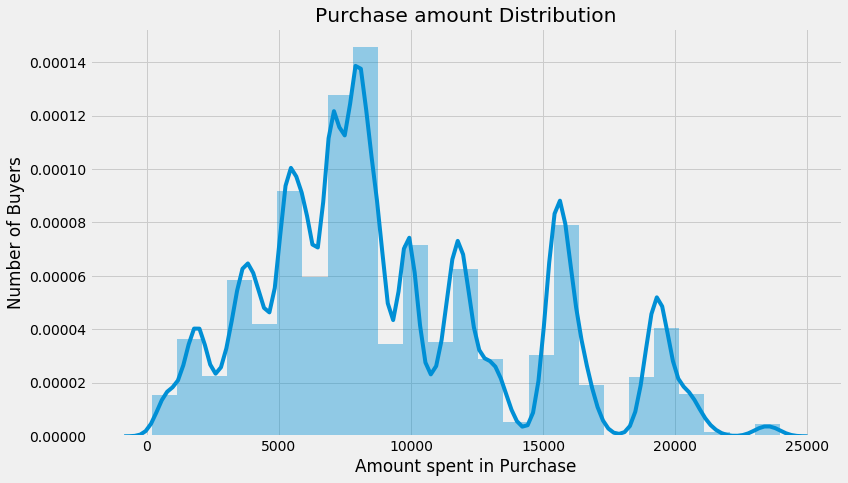

In [6]:
plot_show(data,'Purchase')

In [7]:
data.describe()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.000000,537577.000000,537577.000000,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,1692.331275,0.754087,2.494755,8.08271,1.040567,1.859458,0.408797,5.295546,9.269924,14.174589,9333.859853
std,1.714393e+03,1002.576538,0.430627,1.352583,6.52412,0.759627,1.289828,0.491612,3.750701,4.309034,3.243966,4981.022133
min,1.000001e+06,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,927.000000,1.000000,2.000000,2.00000,0.000000,1.000000,0.000000,1.000000,8.000000,14.000000,5866.000000
50%,1.003031e+06,1646.000000,1.000000,2.000000,7.00000,1.000000,2.000000,0.000000,5.000000,8.000000,15.000000,8062.000000
75%,1.004417e+06,2534.000000,1.000000,3.000000,14.00000,2.000000,3.000000,1.000000,8.000000,14.000000,16.000000,12073.000000
max,1.006040e+06,3622.000000,1.000000,6.000000,20.00000,2.000000,4.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


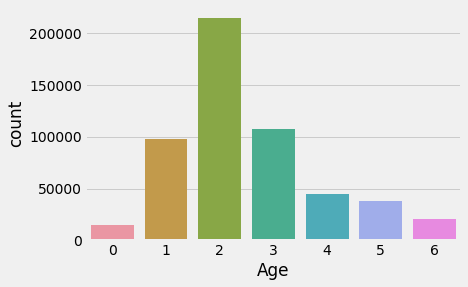

In [8]:
sns.countplot(data.Age)

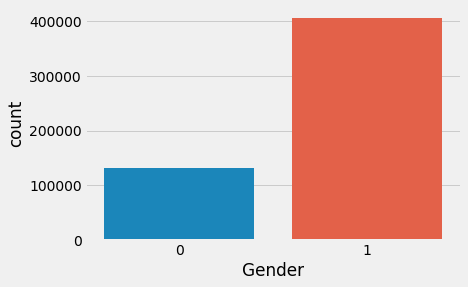

In [9]:
sns.countplot(data.Gender)

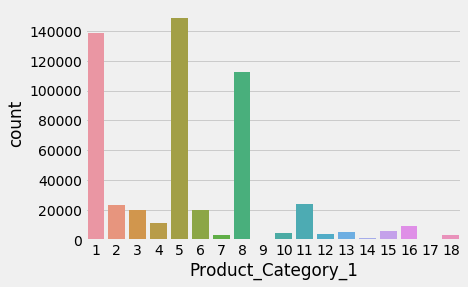

In [10]:
sns.countplot(data.Product_Category_1)

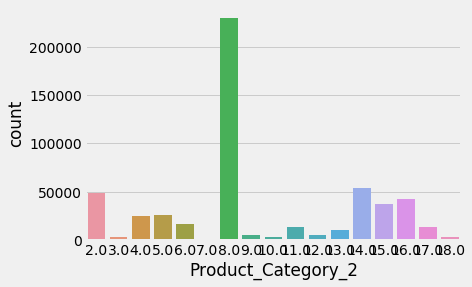

In [11]:
sns.countplot(data.Product_Category_2)

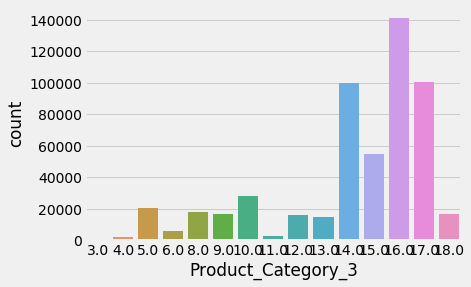

In [12]:
sns.countplot(data.Product_Category_3)

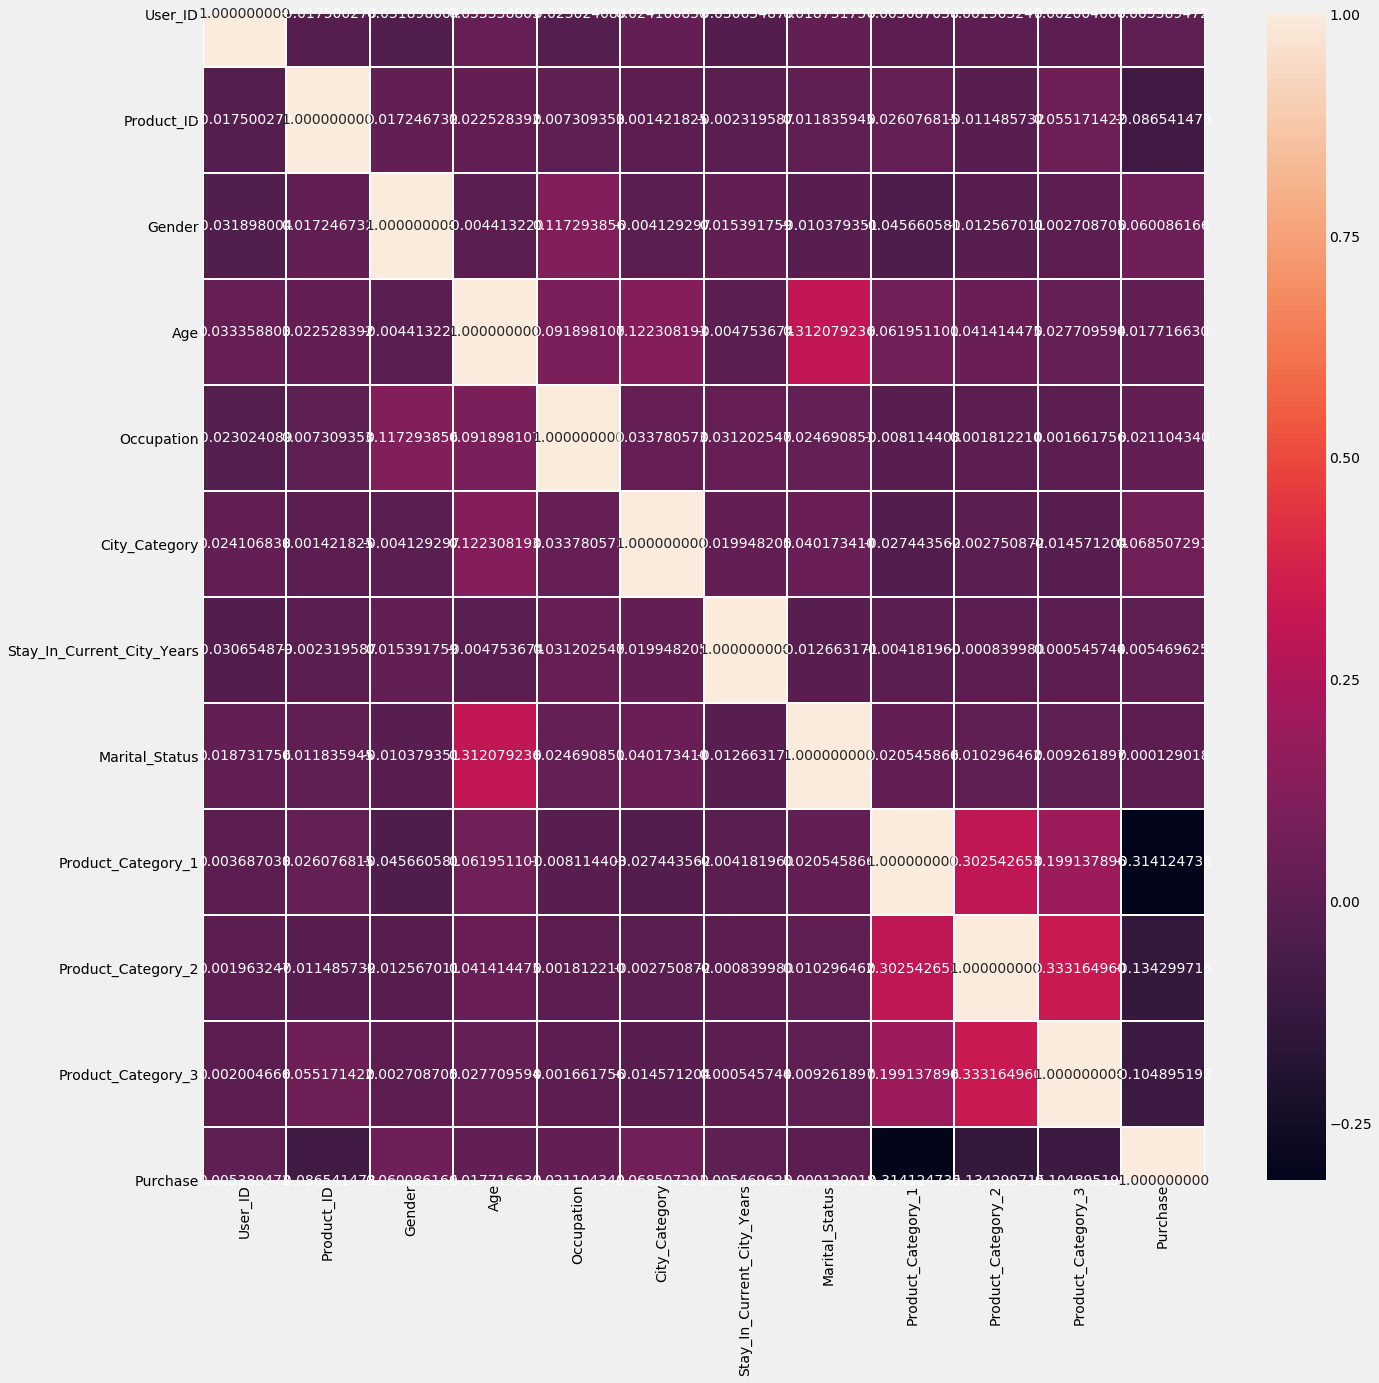

In [13]:
corr = data.corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, linewidths=.9, fmt= '.9f',ax=ax)

## Data scaling

In [14]:
data = scale_data_all(data, "Purchase")
data, min_target, max_target = scale_data_column(data, "Purchase")

In [15]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.000000,0.184981,0.0,0.0,0.5,0.0,0.50,0.0,0.117647,0.3750,0.866667,0.344255
1,0.000000,0.655439,0.0,0.0,0.5,0.0,0.50,0.0,0.000000,0.2500,0.733333,0.631519
2,0.000000,0.234677,0.0,0.0,0.5,0.0,0.50,0.0,0.647059,0.3750,0.400000,0.052027
3,0.000000,0.228051,0.0,0.0,0.5,0.0,0.50,0.0,0.647059,0.7500,0.866667,0.036676
4,0.000166,0.754279,1.0,1.0,0.8,1.0,1.00,0.0,0.411765,0.3750,0.933333,0.327389
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,0.784236,0.504970,1.0,0.5,0.8,1.0,0.25,0.0,0.000000,0.0000,0.800000,0.482798
537573,0.784236,0.281060,1.0,0.5,0.8,1.0,0.25,0.0,0.000000,0.8125,0.866667,0.799588
537574,0.784236,0.915516,1.0,0.5,0.8,1.0,0.25,0.0,0.411765,0.8125,0.800000,0.330501
537575,0.784236,0.755384,1.0,0.5,0.8,1.0,0.25,0.0,0.235294,0.3750,0.400000,0.293868


In [16]:
data = data.drop(["User_ID","Product_ID"], 1)


In [17]:
ploting = data.iloc[0::1000]
ploting

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.0,0.000000,0.50,0.0,0.50,0.0,0.117647,0.3750,0.866667,0.344255
1000,1.0,0.333333,0.00,0.5,0.25,1.0,0.352941,0.3750,0.466667,0.689981
2000,0.0,0.833333,0.30,0.5,0.75,1.0,0.000000,0.0000,0.800000,0.170087
3000,1.0,0.333333,0.70,0.0,0.50,1.0,0.882353,0.3750,0.666667,0.501346
4000,1.0,0.666667,0.05,1.0,0.50,1.0,0.588235,0.3750,0.400000,0.306149
...,...,...,...,...,...,...,...,...,...,...
533000,1.0,0.333333,0.90,0.5,0.25,0.0,0.235294,0.3750,0.866667,0.077683
534000,1.0,0.500000,0.00,0.5,0.00,1.0,0.235294,0.3750,0.933333,0.286381
535000,1.0,0.166667,0.20,1.0,0.50,0.0,0.117647,0.1250,0.400000,0.332142
536000,1.0,0.500000,0.25,0.5,0.25,0.0,0.117647,0.1250,0.133333,0.453735


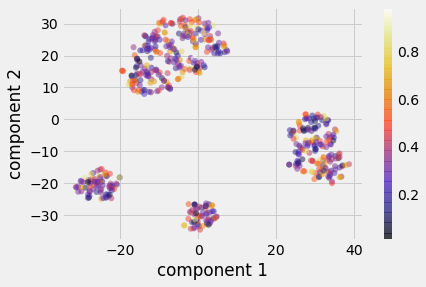

In [18]:
from sklearn.manifold import TSNE


projected = TSNE(n_components=2).fit_transform(ploting.loc[:, ploting.columns != 'Purchase'])

plt.scatter(projected[:, 0], projected[:, 1],
            c=ploting.Purchase, edgecolor='none', alpha=0.5, cmap="CMRmap")
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

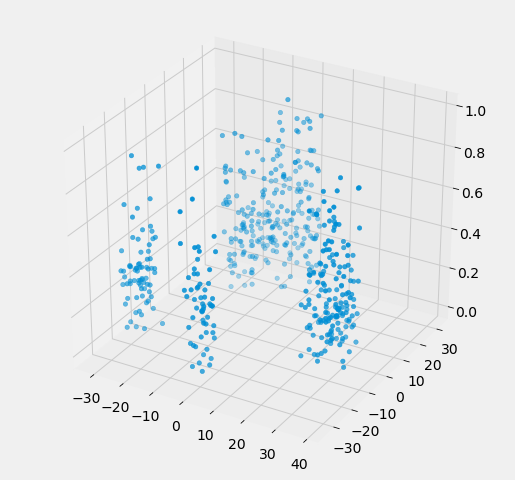

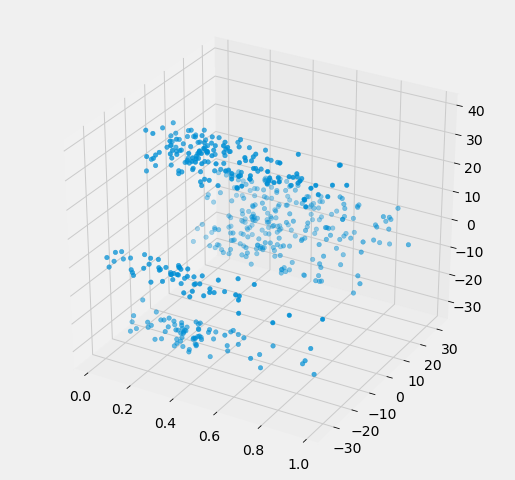

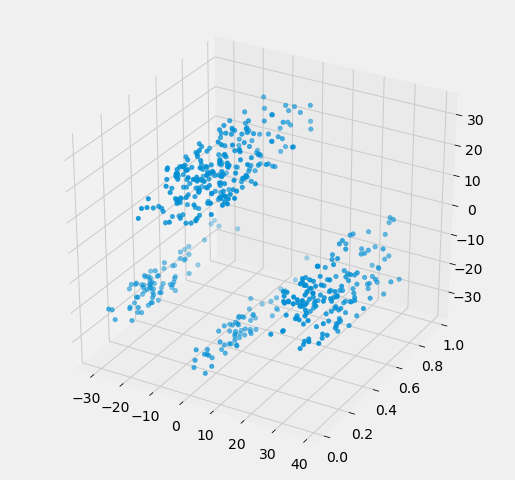

In [19]:
from mpl_toolkits import mplot3d


fig = plt.figure(figsize=(8, 8))  
ax = plt.axes(projection='3d')
ax.scatter3D(projected[:, 0], projected[:, 1], ploting.Purchase, cmap="CMRmap");
fig = plt.figure(figsize=(8, 8))  
ax = plt.axes(projection='3d')
ax.scatter3D(ploting.Purchase, projected[:, 1],projected[:, 0], cmap="CMRmap");
fig = plt.figure(figsize=(8, 8))  
ax = plt.axes(projection='3d')

ax.scatter3D(projected[:, 0], ploting.Purchase, projected[:, 1], cmap="CMRmap");

In [20]:
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0) 

In [21]:
target = "Purchase"
X_train, X_test, y_train, y_test = train_test_split(data.drop(target, 1), data[target], test_size = .2, random_state=10) #split the data

In [22]:
model_fit_regresion(regressor, X_train, X_test, y_train, y_test)

###########################Model_report############################################################
mean_squared_error on train :  0.007450021222808205
mean_squared_error on test :  0.022008309930153486
mean_absolute_error on train :  0.05346531670691313
mean_absolute_error on test :  0.10547241131199184
###########################End_of_report##########################################################


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [23]:
model_ridge = Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.0001)
model_fit_regresion(model_ridge, X_train, X_test, y_train, y_test)

###########################Model_report############################################################
mean_squared_error on train :  0.039131419637510004
mean_squared_error on test :  0.03916319068402046
mean_absolute_error on train :  0.15198258971796527
mean_absolute_error on test :  0.15217319394749695
###########################End_of_report##########################################################


Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.0001)

In [24]:
dtm = DecisionTreeRegressor(max_depth=100,
                           min_samples_split=5,
                           max_leaf_nodes=1000)
model_fit_regresion(dtm, X_train, X_test, y_train, y_test)

###########################Model_report############################################################
mean_squared_error on train :  0.015026153241782785
mean_squared_error on test :  0.01556734676120383
mean_absolute_error on train :  0.0923987523600142
mean_absolute_error on test :  0.09361740364780646
###########################End_of_report##########################################################


DecisionTreeRegressor(criterion='mse', max_depth=100, max_features=None,
                      max_leaf_nodes=1000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')